# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv("data_all.csv")
df.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.e.value_counts()

1.0     6330
7.0     6139
3.0     5969
2.0     5869
0.0     5778
6.0     5705
9.0     5686
8.0     5633
4.0     5619
5.0     5190
24.0    4156
40.0    4092
28.0    3508
55.0    2965
47.0    2535
53.0    2320
18.0    2047
30.0    2002
49.0    1898
12.0    1739
39.0    1683
36.0    1644
29.0    1576
22.0    1485
43.0    1479
15.0    1440
25.0    1397
23.0    1351
10.0    1062
37.0     853
        ... 
27.0     809
32.0     806
34.0     798
31.0     796
13.0     779
11.0     648
19.0     626
42.0     589
17.0     521
52.0     505
56.0     482
59.0     470
57.0     468
58.0     467
46.0     466
50.0     466
35.0     464
48.0     464
61.0     451
16.0     447
54.0     437
38.0     432
33.0     432
44.0     427
26.0     413
41.0     400
20.0     382
60.0     381
51.0     368
45.0     317
Name: e, Length: 62, dtype: int64

In [6]:
df.shape

(116322, 785)

In [7]:
df.e[df.e == 0.0].head()

1     0.0
61    0.0
69    0.0
70    0.0
76    0.0
Name: e, dtype: float64

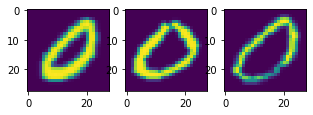

In [8]:
df_plot=df.values
plt.figure(figsize=(5,5))
plt.subplot(1,3,1)
plt.imshow(df_plot[1,1:].reshape(28,28))
plt.subplot(1,3,2)
plt.imshow(df_plot[61,1:].reshape(28,28))
plt.subplot(1,3,3)
plt.imshow(df_plot[76,1:].reshape(28,28))
plt.show()

In [9]:
df.e[df.e == 9.0].head()

33     9.0
53     9.0
86     9.0
104    9.0
151    9.0
Name: e, dtype: float64

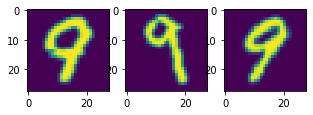

In [10]:
plt.figure(figsize=(5,5))
plt.subplot(1,3,1)
plt.imshow(df_plot[33,1:].reshape(28,28))
plt.subplot(1,3,2)
plt.imshow(df_plot[53,1:].reshape(28,28))
plt.subplot(1,3,3)
plt.imshow(df_plot[151,1:].reshape(28,28))
plt.show()

In [11]:
df.e[df.e == 10.0].head()

194    10.0
302    10.0
496    10.0
737    10.0
790    10.0
Name: e, dtype: float64

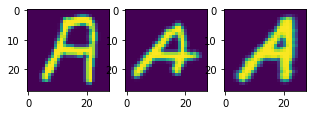

In [12]:
plt.figure(figsize=(5,5))
plt.subplot(1,3,1)
plt.imshow(df_plot[194,1:].reshape(28,28))
plt.subplot(1,3,2)
plt.imshow(df_plot[302,1:].reshape(28,28))
plt.subplot(1,3,3)
plt.imshow(df_plot[737,1:].reshape(28,28))
plt.show()

In [13]:
df.e[df.e == 35.0].head()

105    35.0
391    35.0
436    35.0
536    35.0
593    35.0
Name: e, dtype: float64

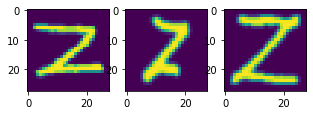

In [14]:
plt.figure(figsize=(5,5))
plt.subplot(1,3,1)
plt.imshow(df_plot[105,1:].reshape(28,28))
plt.subplot(1,3,2)
plt.imshow(df_plot[391,1:].reshape(28,28))
plt.subplot(1,3,3)
plt.imshow(df_plot[593,1:].reshape(28,28))
plt.show()

In [15]:
df.e[df.e == 36.0].head()

0      36.0
24     36.0
165    36.0
191    36.0
336    36.0
Name: e, dtype: float64

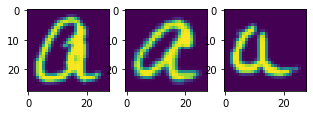

In [16]:
plt.figure(figsize=(5,5))
plt.subplot(1,3,1)
plt.imshow(df_plot[0,1:].reshape(28,28))
plt.subplot(1,3,2)
plt.imshow(df_plot[165,1:].reshape(28,28))
plt.subplot(1,3,3)
plt.imshow(df_plot[191,1:].reshape(28,28))
plt.show()

#### Después de graficar varios valores, encontre que los dígitos van del 0 al 9, las letras minúsculas van del 10 al 35 (ya que son 26 letras en el abeceario gringo) y las mayúsculas van del 36 al 51

# Etapa de creación y ejecución del modelo

In [17]:
#Seleccionar tus datos para entrenar y tu columna a predecir:
y=df.e
X=df.iloc[:,1:]

y.shape, X.shape
#Pasar a array los datos para poder hacer un reshape de "y"
y=y.to_numpy()
X=X.to_numpy()
y=y.reshape(-1,1)

y.shape, X.shape

((116322, 1), (116322, 784))

In [18]:
#Filtrar las columnas que tengan puros 0's
X=X[:, X.sum(axis=0)!=0]
X.shape
#Se eliminaron 36 columnas

(116322, 749)

In [19]:
## Modificar los valores a 0,1 o 2 de la columna y, para decir si es un número, lower o upper:
## 0:número, 1:upper, 2:lower

for e in range(len(y)):
    if y[e] < 10:
        y[e] = 0
    elif 10 <= y[e] <= 35:
        y[e] = 1
    else:
        y[e] = 2

In [20]:
pd.DataFrame(y,columns=["label"]).label.value_counts()
#Esto quiere decir que al rededor del 50% de los datos son números, el 30% son mayúsculas y el 20% son minúsculas, aproximadamente.

0.0    57918
1.0    31345
2.0    27059
Name: label, dtype: int64

In [21]:
#Train/Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [22]:
def printing_results(model,x_tr,y_tr,x_ts,y_ts):
    
    print("El R-cuadrado del modelo entrenado es: ",model.score(x_tr,y_tr))
    print("La precisión de clasificación (accuracy score) para el test es: ",accuracy_score(y_ts, model.predict(x_ts)))

In [23]:
##### Regresión Logística:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(C=0.01, penalty='l2', tol=0.0001, max_iter=70, solver='lbfgs', multi_class='multinomial')
logreg=logreg.fit(X_train,y_train)
printing_results(logreg,X_train,y_train,X_test,y_test)


El R-cuadrado del modelo entrenado es:  0.6474707992801549
La precisión de clasificación (accuracy score) para el test es:  0.645851243079674


In [24]:
##### Árbol de desición 1:
from sklearn.tree import DecisionTreeClassifier as DTC
dt=DTC()
dt=dt.fit(X_train,y_train)
printing_results(dt,X_train,y_train,X_test,y_test)

El R-cuadrado del modelo entrenado es:  1.0
La precisión de clasificación (accuracy score) para el test es:  0.6712286372545648


In [25]:
##### Árbol de desición 2:
dt=DTC(min_samples_leaf=2)
dt=dt.fit(X_train,y_train)
printing_results(dt,X_train,y_train,X_test,y_test)

El R-cuadrado del modelo entrenado es:  0.9643745486640456
La precisión de clasificación (accuracy score) para el test es:  0.6782435267012826


In [26]:
##### Bosque Aleatorio 1:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc=RFC(n_estimators=100)
rfc=rfc.fit(X_train,y_train)
printing_results(rfc,X_train,y_train,X_test,y_test)

El R-cuadrado del modelo entrenado es:  1.0
La precisión de clasificación (accuracy score) para el test es:  0.812592414291118


In [27]:
##### Bosque Aleatorio 2:
rfc=RFC(n_estimators=90,min_samples_leaf=2)
rfc=rfc.fit(X_train,y_train)
printing_results(rfc,X_train,y_train,X_test,y_test)

El R-cuadrado del modelo entrenado es:  0.9971458373929689
La precisión de clasificación (accuracy score) para el test es:  0.8112169457721536


In [28]:
##### Bosque Aleatorio 3:
rfc=RFC(n_estimators=90,min_samples_leaf=4, min_samples_split=2)
rfc=rfc.fit(X_train,y_train)
printing_results(rfc,X_train,y_train,X_test,y_test)

El R-cuadrado del modelo entrenado es:  0.9677445237904196
La precisión de clasificación (accuracy score) para el test es:  0.8086035555861215


In [29]:
##### Bosque Aleatorio 4:
rfc=RFC(n_estimators=80,min_samples_leaf=2, min_samples_split=4)
rfc=rfc.fit(X_train,y_train)
printing_results(rfc,X_train,y_train,X_test,y_test)

El R-cuadrado del modelo entrenado es:  0.9965153998693275
La precisión de clasificación (accuracy score) para el test es:  0.8106667583645679


In [1]:
##### Bosque Aleatorio con RandomizedSearch:
#from sklearn.model_selection import RandomizedSearchCV
#
#n_estimators = [int(x) for x in range(10,100,10)]
#max_features = ['auto', 'sqrt']
#min_samples_split = [2, 4, 8]
#min_samples_leaf = [1, 2, 4]
#
#random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf
#              }
#
#rfc_grid = RandomizedSearchCV(estimator = rfc, 
#                               param_distributions = random_grid, 
#                               n_iter = 100, 
#                               cv = 3, 
#                               verbose=10, 
#                               n_jobs = 1
#                             )

#Aborte este proceso ya que un random forest para más de 700 variables, además del proceso Randomized, es mucho tiempo de procesamiento.
#Lo deje correr 1 hora y no acababa..